In [325]:
import random
import matplotlib.pyplot as plt
import numpy
from random import seed, randint
from enum import Enum
# affiche les graphes dans le corps du notebook
%matplotlib inline 
tabgob = range(1,4)
print(tabgob[0],tabgob[1],tabgob[2])
# donne la liste des numéros des trois gobelets possibles
class Strategie(Enum):
    idem = 1 # ne pas changer de choix
    alter = 2 # changer de choix
    alea = 3 # adopter aléatoirement une des deux stratégies ci-dessus
# définit un classe stratégie

1 2 3


In [326]:
# tire le numéro du gobelet gagnant entre 1 et 3
def tirage():
    return random.randint(1,3)

In [327]:
#### fonction qui retourne le gobelet restant en cas de chgmt de choix
def gobrestant(tabgob, tiralea, chxj):
    tabgob.pop(tabgob.index(chxj)) # retire de la liste celui qu'il avait choisi
    if tiralea == chxj:
        return random.randint(0,1) # renvoie un des deux perdants au hasard
    else:
        return tiralea # renvoie le gagnant

In [328]:
#### fonction qui retourne le résultat selon la stratégie
def resultat(strat, tir, chx):
    if strat == Strategie.alea: # si le joueur choisit aléatoirement sa stratégie
        if random.randint(0,1) == 1:
            strat = Strategie.alter
        else:
            strat = Strategie.idem
    if strat == Strategie.idem: # si le joueur garde son choix de départ
        return chx == tir
    elif strat == Strategie.alter: # si le joueur change de choix
        return gobrestant([1,2,3],tir,chx) == tir
    else:
        print("Erreur de stratégie !")

In [329]:
#### test des principales fonctions
tir = tirage()
chx = tirage()
print(tir,chx,gobrestant([1,2,3],tir,chx))
print(resultat(Strategie.idem,tir,chx))
print(resultat(Strategie.alter,tir,chx))

1 2 1
False
True


In [330]:
#### fonction qui permet de calculer un tableau de résultats pour le joueur 1 ou 2
#def cohorte(nbe,strat):
#    tab = []
#    for i in range(0,nbe):
#        tiralea = tirage()
#        if resultat(strat, tiralea):
#            tab.append(1)
#        else:
#            tab.append(0)
#    return tab

#### Le même code que ci-dessus en bcp plus simple grâce à une compréhension de liste
def cohorte(nbe,strat):
    tab_tir = [tirage() for i in range(0,nbe)]
    tab_chx = [tirage() for i in range(0,nbe)]
    return [1 if resultat(strat, tab_tir[i], tab_chx[i]) else 0 for i in range(0,nbe)]

In [331]:
ma_coh_idem = cohorte(100,Strategie.idem)
ma_coh_alter = cohorte(100,Strategie.alter)
ma_coh_alea = cohorte(100,Strategie.alea)

In [332]:
print(ma_coh_idem,sum(ma_coh_idem))
print(ma_coh_alter,sum(ma_coh_alter))
print(ma_coh_alea,sum(ma_coh_alea))

[0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0] 31
[1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0] 69
[0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0] 49


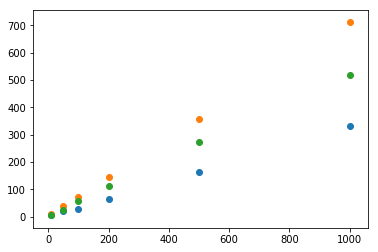

In [345]:
### trace le graphe des nbe de victoires en fonction du nombre d'essai pour les 3 stratégies
effectifs=[10,50,100,200,500,1000]
tab_coh_idem = [sum(cohorte(nbe,Strategie.idem)) for nbe in effectifs]
tab_coh_alter = [sum(cohorte(nbe,Strategie.alter)) for nbe in effectifs]
tab_coh_alea = [sum(cohorte(nbe,Strategie.alea)) for nbe in effectifs]
figure = plt.figure()
plot = plt.scatter(effectifs,tab_coh_idem)
plot = plt.scatter(effectifs,tab_coh_alter)
plot = plt.scatter(effectifs,tab_coh_alea)

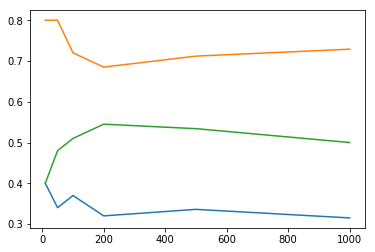

In [344]:
### trace le graphe du gain moyen en fonction du nombre d'essai pour les 3 stratégies
esp_coh_idem = [sum(cohorte(nbe,Strategie.idem))/nbe for nbe in effectifs]
esp_coh_alter = [sum(cohorte(nbe,Strategie.alter))/nbe for nbe in effectifs]
esp_coh_alea = [sum(cohorte(nbe,Strategie.alea))/nbe for nbe in effectifs]
figure = plt.figure()
plot = plt.plot(effectifs,esp_coh_idem)
plot = plt.plot(effectifs,esp_coh_alter)
plot = plt.plot(effectifs,esp_coh_alea)

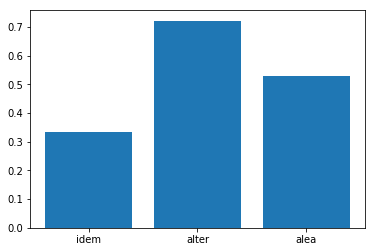

In [349]:
### trace l'histogramme qui compare les gains moyens des 3 stratégies pour nbe essais
nbe = 10000000
plot = plt.bar([1,2,3], [sum(cohorte(nbe,Strategie.idem))/nbe, \
               sum(cohorte(nbe,Strategie.alter))/nbe, sum(cohorte(nbe,Strategie.alea))/nbe], \
              tick_label=["idem", "alter", "alea"])